<a href="https://colab.research.google.com/github/federico-700/TP1_spotify_youtube/blob/main/Proyecto_spotify_youtube_parte_1_Doma%C3%B1ski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Proyecto Spotify Youtube

"""Este trabajo tiene como objetivo analizar un dataset que contiede datos de Spotify y YouTube con 28 columnas y más de 10,000 registros.
Primero, se realizará una limpieza de datos para identificar y corregir valores nulos o inconsistentes.
Luego, en el análisis exploratorio (EDA), se calcularán estadísticas descriptivas como media y mediana,
junto con gráficos para comprender la distribución y las relaciones entre variables.
En una segunda fase, se implementará un modelo de machine learning que permita explorar posibles relaciones y patrones en los datos,
abordando tareas como la predicción de visitas en YouTube/Spotify en función de características relevantes
y la clasificación de canciones según su popularidad"""

#fuente:https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube


'Este trabajo tiene como objetivo analizar un dataset que contiede datos de Spotify y YouTube con 28 columnas y más de 10,000 registros.\nPrimero, se realizará una limpieza de datos para identificar y corregir valores nulos o inconsistentes. \nLuego, en el análisis exploratorio (EDA), se calcularán estadísticas descriptivas como media y mediana,\njunto con gráficos para comprender la distribución y las relaciones entre variables.\nEn una segunda fase, se implementará un modelo de machine learning que permita explorar posibles relaciones y patrones en los datos,\nabordando tareas como la predicción de visitas en YouTube/Spotify en función de características relevantes\ny la clasificación de canciones según su popularidad'

In [59]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

from google.colab import files
import io

import matplotlib.pyplot as plt


df = pd.read_csv("Spotify_Youtube.csv")

df.tail()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0
20717,20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,0.498,0.938,6.0,...,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


In [60]:
#Renombramos las columnas, del ingles al español


df=df.rename(columns={'Unnamed: 0': 'id','Artist':'artista','Track':'cancion','Danceability':'bailabilidad','Energy':'energia','Key':'tonalidad','Loudness':'volumen','Speechiness':'hablabilidad','Acousticness':'acustica','Instrumentalness':'instrumental','Liveness':'vivencia','Valence':'valencia','Tempo':'tiempo','Duration_ms':'duracion','Title':'titulo_youtube','Channel':'canal','Views':'vistas','Likes':'likes','Comments':'comentarios','Description':'descripcion_youtube','Licensed':'licencia','Stream':'reproducciones_spotify','Album_type':'album_type'})
df.columns

Index(['id', 'artista', 'Url_spotify', 'cancion', 'Album', 'album_type', 'Uri',
       'bailabilidad', 'energia', 'tonalidad', 'volumen', 'hablabilidad',
       'acustica', 'instrumental', 'vivencia', 'valencia', 'tiempo',
       'duracion', 'Url_youtube', 'titulo_youtube', 'canal', 'vistas', 'likes',
       'comentarios', 'descripcion_youtube', 'licencia', 'official_video',
       'reproducciones_spotify'],
      dtype='object')

In [56]:
#df=df['vistas'].map('{:.2f}'.format)

In [61]:
"""
Descripcion de las variables

Cancion: nombre de la canción, tal como se ve en la plataforma Spotify.
Artista: nombre del artista.
Url_spotify: la URL del artista.
Album: el álbum en el que se encuentra la canción en Spotify.
Album_type: indica si la canción se lanzó en Spotify como single o está contenida en un álbum.
Uri: un enlace de Spotify que se utiliza para encontrar la canción a través de la API.
Bailabilidad: describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del pulso y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.
Energia: es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Por lo general, las pistas energéticas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptivas que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, velocidad de inicio y entropía general.
Tonalidad: la tonalidad en la que se encuentra la pista. Los números enteros se asignan a tonos utilizando la notación de clase de tono estándar. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no se detectó ninguna tonalidad, el valor es -1.
Volumen: el volumen general de una pista en decibeles (dB). Los valores de volumen se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. El volumen es la calidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.
Hablabilidad: detecta la presencia de palabras habladas en una pista. Cuanto más parecida a un habla sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro, poesía), más cerca de 1.0 estará el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente estén compuestas completamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como diálogo, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores inferiores a 0,33 probablemente representan música y otras pistas que no son de diálogo.
Acustica: una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1,0 representa una alta confianza de que la pista es acústica.
Instrumentalidad: predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.
Vivencia: detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista sea en vivo. Valencia: medida de 0,0 a 1,0 que describe la positividad musical que transmite una canción. Las canciones con una valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las canciones con una valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enfadadas).
Tempo: tempo general estimado de una canción en pulsaciones por minuto (PPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de las pulsaciones.
Duración: duración de la canción en milisegundos.
Reproducciones_spotify: número de reproducciones de la canción en Spotify.
Url_youtube: url del vídeo enlazado a la canción en Youtube, si lo hay.
Título: título del videoclip en Youtube.
Canal: nombre del canal que ha publicado el vídeo.
Vistas: número de visualizaciones.
Likes: número de me gusta.
Comentarios: número de comentarios.
Descripción_youtube: descripción del vídeo en Youtube.
Licencia: indica si el video representa contenido con licencia, lo que significa que el contenido se cargó en un canal vinculado a un socio de contenido de YouTube y luego fue reclamado por ese socio.
Official_video: valor booleano que indica si el video encontrado es el video oficial de la canción."""


'\nDescripcion de las variables\n\nCancion: nombre de la canción, tal como se ve en la plataforma Spotify.\nArtista: nombre del artista.\nUrl_spotify: la URL del artista.\nAlbum: el álbum en el que se encuentra la canción en Spotify.\nAlbum_type: indica si la canción se lanzó en Spotify como single o está contenida en un álbum.\nUri: un enlace de Spotify que se utiliza para encontrar la canción a través de la API.\nBailabilidad: describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del pulso y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.\nEnergia: es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Por lo general, las pistas energéticas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características per

In [62]:
df.shape


(20718, 28)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20718 non-null  int64  
 1   artista                 20718 non-null  object 
 2   Url_spotify             20718 non-null  object 
 3   cancion                 20718 non-null  object 
 4   Album                   20718 non-null  object 
 5   album_type              20718 non-null  object 
 6   Uri                     20718 non-null  object 
 7   bailabilidad            20716 non-null  float64
 8   energia                 20716 non-null  float64
 9   tonalidad               20716 non-null  float64
 10  volumen                 20716 non-null  float64
 11  hablabilidad            20716 non-null  float64
 12  acustica                20716 non-null  float64
 13  instrumental            20716 non-null  float64
 14  vivencia                20716 non-null

In [64]:
#Se ha procedido a una depuración del conjunto de datos, eliminando variables que no contribuyen significativamente al modelo, como es el caso de 'url_spotify'.
#Se va hacer un nuevo dataset con las variables mas relevantes, llamado df_reducido

df_reducido =df[['id','artista','cancion','album_type','bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','vistas','likes','comentarios','reproducciones_spotify']]
df_reducido.tail()


,id,artista,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify
20713,20713,SICK LEGEND,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.44800,0.0000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9227144.0
20714,20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.02800,0.0000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,10898176.0
20715,20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.02430,0.0000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6226110.0
20716,20716,SICK LEGEND,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.35600,0.0184,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6873961.0
20717,20717,SICK LEGEND,MISS YOU HARDSTYLE,single,0.498,0.938,6.0,-4.543,0.1070,0.00277,0.9110,0.1360,0.0787,160.067,181500.0,158697.0,2484.0,0.0,5695584.0


In [65]:
df_reducido.shape

(20718, 19)

In [48]:
df_reducido.describe()

,id,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [66]:
print("\nValores nulos en el conjunto de datos:")
print(df_reducido.isnull().sum())


Valores nulos en el conjunto de datos:
id                          0
artista                     0
cancion                     0
album_type                  0
bailabilidad                2
energia                     2
tonalidad                   2
volumen                     2
hablabilidad                2
acustica                    2
instrumental                2
vivencia                    2
valencia                    2
tiempo                      2
duracion                    2
vistas                    470
likes                     541
comentarios               569
reproducciones_spotify    576
dtype: int64


In [67]:
#Estrategia 1: remover filas faltantes:Los datos faltantes que faltan en bailabilidad son los mismos que faltan
# en energia, tonalidad, volumen, hablabilidad, acustica, instrumental, vivencia, valencia, tiempo y duracion
#como solo son dos filas, estas se van a borrar

df_limpio_1 =df_reducido.dropna(subset=['energia'])
print(df_limpio_1.isnull().sum())


id                          0
artista                     0
cancion                     0
album_type                  0
bailabilidad                0
energia                     0
tonalidad                   0
volumen                     0
hablabilidad                0
acustica                    0
instrumental                0
vivencia                    0
valencia                    0
tiempo                      0
duracion                    0
vistas                    469
likes                     540
comentarios               568
reproducciones_spotify    576
dtype: int64


In [68]:
df_limpio_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20716 entries, 0 to 20717
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20716 non-null  int64  
 1   artista                 20716 non-null  object 
 2   cancion                 20716 non-null  object 
 3   album_type              20716 non-null  object 
 4   bailabilidad            20716 non-null  float64
 5   energia                 20716 non-null  float64
 6   tonalidad               20716 non-null  float64
 7   volumen                 20716 non-null  float64
 8   hablabilidad            20716 non-null  float64
 9   acustica                20716 non-null  float64
 10  instrumental            20716 non-null  float64
 11  vivencia                20716 non-null  float64
 12  valencia                20716 non-null  float64
 13  tiempo                  20716 non-null  float64
 14  duracion                20716 non-null  flo

In [70]:
#Estrategia 2, para los valorse faltantes en las columnas vistas, likes, comentarios y reproducciones_spotify se va a usar la mediana de cada columna

# Reemplaza los valores nulos con la mediana de cada columna correspondiente
df_limpio_1['vistas'].fillna(df_limpio_1['vistas'].median(), inplace=True)
df_limpio_1['likes'].fillna(df_limpio_1['likes'].median(), inplace=True)
df_limpio_1['comentarios'].fillna(df_limpio_1['comentarios'].median(), inplace=True)
df_limpio_1['reproducciones_spotify'].fillna(df_limpio_1['reproducciones_spotify'].median(), inplace=True)




#df_limpio_1.vistas.fillna("median",inplace=True)
#df_limpio_1.likes.fillna("median",inplace=True)
#df_limpio_1.comentarios.fillna("median",inplace=True)
#df_limpio_1.reproducciones_spotify.fillna("median",inplace=True)

print(df_limpio_1.isnull().sum())





id                        0
artista                   0
cancion                   0
album_type                0
bailabilidad              0
energia                   0
tonalidad                 0
volumen                   0
hablabilidad              0
acustica                  0
instrumental              0
vivencia                  0
valencia                  0
tiempo                    0
duracion                  0
vistas                    0
likes                     0
comentarios               0
reproducciones_spotify    0
dtype: int64


<ipython-input-70-b30e95038d9e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio_1['vistas'].fillna(df_limpio_1['vistas'].median(), inplace=True)
<ipython-input-70-b30e95038d9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_1['vistas'].fillna(df_limpio_1['vistas'].median(), inplace=True)
<ipython-input-70-b30e95038d9e>:5

In [73]:
#Analisis exploratorio de datos (EDA)
df_limpio_1.describe().round(2)

# Cuando se explicaron el signficado de las columnas se establecio el rango de estas, las mayorias van entre 0 y 1,
#esto tambien se ve en el analisis exploratorio de los datos, en el siguiente cuadro


,id,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify
count,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,2.071600e+04,20716.00,20716.00,2.071600e+04
mean,10358.26,0.62,0.64,5.30,-7.67,0.10,0.29,0.06,0.19,0.53,120.64,224717.58,9.214290e+07,649318.58,26855.27,1.335444e+08
std,5981.15,0.17,0.21,3.58,4.63,0.11,0.29,0.19,0.17,0.25,29.58,124790.54,2.717807e+08,1767974.87,190612.85,2.411434e+08
min,0.00,0.00,0.00,0.00,-46.25,0.00,0.00,0.00,0.01,0.00,0.00,30985.00,0.000000e+00,0.00,0.00,6.574000e+03
25%,5178.75,0.52,0.51,2.00,-8.86,0.04,0.05,0.00,0.09,0.34,97.00,180009.50,1.948664e+06,23018.25,542.00,1.825355e+07
50%,10357.50,0.64,0.67,5.00,-6.54,0.05,0.19,0.00,0.12,0.54,119.96,213284.50,1.450110e+07,124474.50,3277.00,4.967698e+07
75%,15538.25,0.74,0.80,8.00,-4.93,0.10,0.48,0.00,0.24,0.73,139.94,252443.00,6.750037e+07,499732.25,13730.25,1.337773e+08
max,20717.00,0.98,1.00,11.00,0.92,0.96,1.00,1.00,1.00,0.99,243.37,4676058.00,8.079649e+09,50788652.00,16083138.00,3.386520e+09


In [74]:
df_limpio_1['artista'] = df_limpio_1['artista'].astype('category')
df_limpio_1['cancion'] = df_limpio_1['cancion'].astype('category')
df_limpio_1['album_type'] = df_limpio_1['album_type'].astype('category')

<ipython-input-74-bc1c16f44361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_1['artista'] = df_limpio_1['artista'].astype('category')
<ipython-input-74-bc1c16f44361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_1['cancion'] = df_limpio_1['cancion'].astype('category')
<ipython-input-74-bc1c16f44361>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [75]:
df_limpio_1.describe(include='category')

,artista,cancion,album_type
count,20716,20716,20716
unique,2079,17839,3
top,$NOT,El Ultimo Adiós - Varios Artistas Version,album
freq,10,24,14924


<ipython-input-103-ad7e5e7522cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_1['reproducciones_spotify'] = pd.to_numeric(df_limpio_1['reproducciones_spotify'], errors='coerce')
<ipython-input-103-ad7e5e7522cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_1['vistas'] = pd.to_numeric(df_limpio_1['vistas'], errors='coerce')


La correlación entre las vistas de YouTube y las reproducciones de Spotify es de aproximadamente 0.6
Este valor representa una correlación positiva moderada entre ambas variables, lo que significa que, en general,
cuando una variable aumenta, la otra tiende a hacerlo también, aunque esta relación no es perfectamente lineal.
A priori pensaba que esta correlación iba a ser más alta.
Es probable que existan otros factores que influyen en el rendimiento de las canciones en cada plataforma,
como la demografía de la audiencia, el marketing, o el tipo de contenido que funciona mejor en cada plataforma


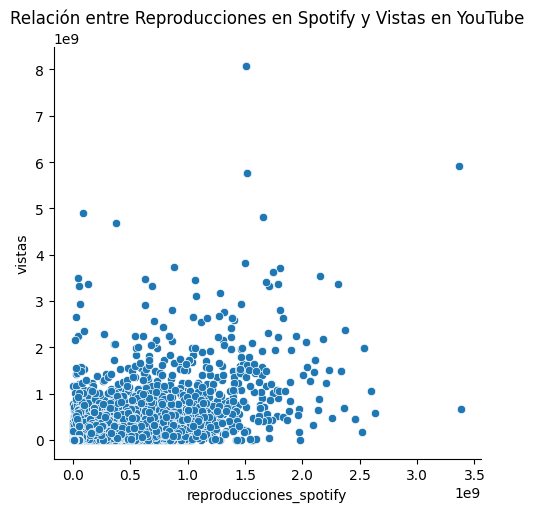

In [103]:
#)Existe una correlación entre la popularidad de una canción en Spotify (reproducciones) y youtube(visualizaciones)?

#Correlacion
df_limpio_1['reproducciones_spotify'] = pd.to_numeric(df_limpio_1['reproducciones_spotify'], errors='coerce')
df_limpio_1['vistas'] = pd.to_numeric(df_limpio_1['vistas'], errors='coerce')
correlacion =df_limpio_1['reproducciones_spotify'].corr(df_limpio_1['vistas'])


#Grafico
g=sns.relplot(data=df_limpio_1, x="reproducciones_spotify", y="vistas", kind='scatter')
# Agregar el título
g.set(title="Relación entre Reproducciones en Spotify y Vistas en YouTube")



print("La correlación entre las vistas de YouTube y las reproducciones de Spotify es de aproximadamente", round(correlacion, 2))
print("Este valor representa una correlación positiva moderada entre ambas variables, lo que significa que, en general,")
print("cuando una variable aumenta, la otra tiende a hacerlo también, aunque esta relación no es perfectamente lineal.")
print("A priori pensaba que esta correlación iba a ser más alta.")
print("Es probable que existan otros factores que influyen en el rendimiento de las canciones en cada plataforma,")
print("como la demografía de la audiencia, el marketing, o el tipo de contenido que funciona mejor en cada plataforma")








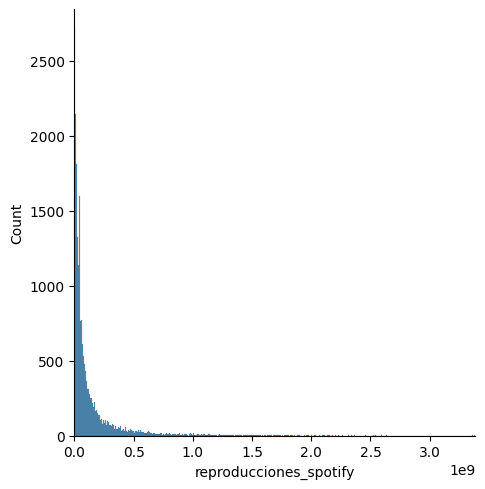

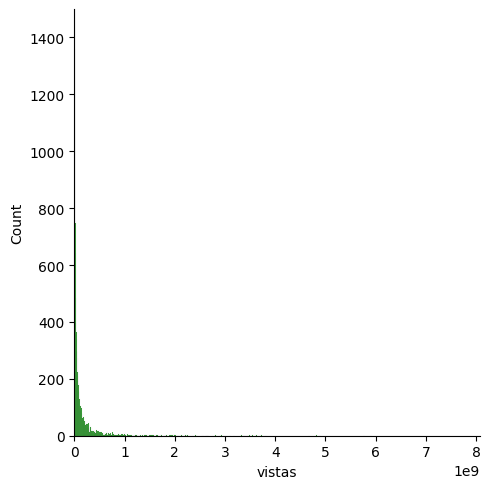


El análisis del gráfico de correlación generó la inquietud sobre la distribución de las reproducciones en YouTube y Spotify.
Inicialmente, se esperaba una distribución normal, donde la mayoría de las canciones tuvieran un número de reproducciones cercano a la media/mediana
y los valores extremos representaran las canciones más populares y menos escuchadas. 
Sin embargo, en los histogramas se ve que la mayoría de las canciones presentan muy pocas reproducciones, 
sugiriendo una distribución asimétrica, con una concentración de valores bajos y una cola extendida hacia la derecha para las canciones más reproducidas. 
Este patrón es común en fenómenos de popularidad, donde solo unas pocas canciones acumulan la mayor parte de las reproducciones.


In [124]:





#Reproducciones Spotify
sns.displot(data=df_limpio_1, x="reproducciones_spotify")
plt.xlim(0, df_limpio_1["reproducciones_spotify"].max())  # Ajusta 0 como límite inferior
plt.show()



#Reproducciones Youtube
sns.displot(data=df_limpio_1, x="vistas", color="green")
plt.ylim(0, 1500) #Uso 1500 como límite porque los datos llegan mas o menos hasta 1000
plt.xlim(0, df_limpio_1["vistas"].max())  # Ajusta 0 como límite inferior
plt.show()



print("""
El análisis del gráfico de correlación generó la inquietud sobre la distribución de las reproducciones en YouTube y Spotify.
Inicialmente, se esperaba una distribución normal, donde la mayoría de las canciones tuvieran un número de reproducciones cercano a la media/mediana
y los valores extremos representaran las canciones más populares y menos escuchadas.
Sin embargo, en los histogramas se ve que la mayoría de las canciones presentan muy pocas reproducciones,
sugiriendo una distribución asimétrica, con una concentración de valores bajos y una cola extendida hacia la derecha para las canciones más reproducidas.
Este patrón es común en fenómenos de popularidad, donde solo unas pocas canciones acumulan la mayor parte de las reproducciones.""")








In [30]:
#correlacion_total=df_limpio_1[['bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','vistas','likes','comentarios','reproducciones_spotify']].corr()



#correlacion_total=df_limpio_1[['bailabilidad','energia','tonalidad','volumen']].corr()
correlacion_total=df_limpio_1[['bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','vistas','reproducciones_spotify','likes']].corr()


print(correlacion_total)




                        bailabilidad   energia  tonalidad   volumen  \
bailabilidad                1.000000  0.236596   0.037735  0.353408   
energia                     0.236596  1.000000   0.030160  0.744845   
tonalidad                   0.037735  0.030160   1.000000  0.025266   
volumen                     0.353408  0.744845   0.025266  1.000000   
hablabilidad                0.210376  0.065319   0.019778  0.033699   
acustica                   -0.279435 -0.658304  -0.030818 -0.547680   
instrumental               -0.318611 -0.310058   0.000747 -0.545406   
vivencia                   -0.084482  0.173717  -0.011008  0.087062   
valencia                    0.465756  0.389158   0.042559  0.311578   
tiempo                     -0.065943  0.157383   0.001855  0.144766   
duracion                   -0.089159  0.022660   0.003186  0.012063   
vistas                      0.088186  0.066274   0.007927  0.117776   
reproducciones_spotify      0.073760  0.043357  -0.007165  0.118866   
likes 